In [6]:
# What factors influence a student to receive a job offer? 
# In other words, what does it take for a student to get a job position?
# We will also learn to predict if a student gets placed.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

import warnings
warnings.filterwarnings("ignore")

rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [8]:
candidate_df = pd.read_csv('data.csv')
candidate_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [9]:
candidate_df.drop(columns = ['salary', 'sl_no'], inplace = True)
candidate_df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [10]:
# We removed sl_no and salary as these values obviously do not impact whether a student receives a job position.

In [11]:
candidate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [12]:
# We have 215 entries and 13 attributes (8 objects, 5 float64)

In [13]:
candidate_df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [14]:
# There are no null values.

In [15]:
candidate_df.describe(include = 'all')

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215
unique,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2
top,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed
freq,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148
mean,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN
std,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN
min,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN
25%,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN
50%,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN
75%,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN


In [16]:
candidate_df[candidate_df['status'] == 'Not Placed'].describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,67.000000,67.000000,67.000000,67.000000,67.000000
mean,57.544030,58.395522,61.134179,69.587910,61.612836
std,8.394246,9.914090,6.365825,11.930687,5.705689
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,52.000000,51.000000,57.000000,60.000000,58.480000
50%,56.280000,60.330000,61.000000,67.000000,60.690000
75%,63.000000,64.000000,65.000000,76.500000,65.405000
max,77.800000,82.000000,79.000000,97.000000,75.710000


In [17]:
candidate_df[candidate_df['status'] == 'Placed'].describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,71.721486,69.926554,68.740541,73.238041,62.579392
std,8.715445,9.329268,6.518087,13.729333,5.884583
min,49.000000,50.830000,56.000000,50.000000,52.380000
25%,65.000000,63.000000,65.000000,60.000000,57.772500
50%,72.500000,68.000000,68.000000,72.000000,62.245000
75%,78.125000,75.250000,72.422500,85.000000,66.760000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [18]:
# The mean of the students' scores who got placed is higher than that of those who did not get placed. 

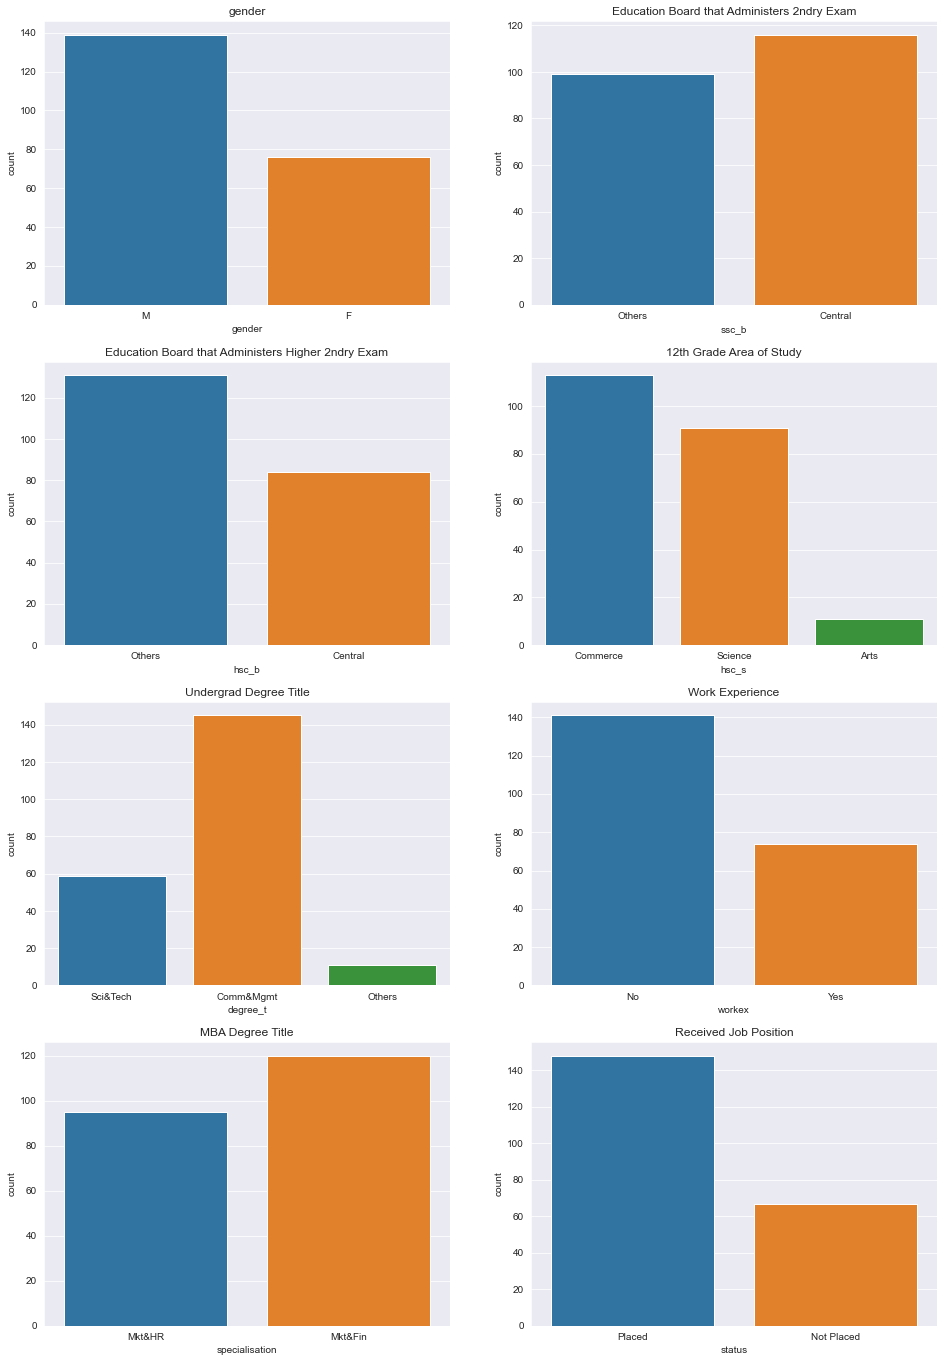

In [19]:
# Exploratory Data Analysis
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(16,24))
sns.countplot(x = candidate_df['gender'], ax=axes[0,0])
axes[0,0].set(title = 'gender')
sns.countplot( x = candidate_df['ssc_b'], ax=axes[0,1])
axes[0,1].set(title = 'Education Board that Administers 2ndry Exam')
sns.countplot(x = candidate_df['hsc_b'], ax=axes[1,0])
axes[1,0].set(title = 'Education Board that Administers Higher 2ndry Exam')
sns.countplot( x = candidate_df['hsc_s'], ax=axes[1,1])
axes[1,1].set(title = '12th Grade Area of Study')
sns.countplot(x = candidate_df['degree_t'], ax=axes[2,0])
axes[2,0].set(title = 'Undergrad Degree Title')
sns.countplot( x = candidate_df['workex'], ax=axes[2,1])
axes[2,1].set(title = 'Work Experience')
sns.countplot(x = candidate_df['specialisation'], ax=axes[3,0])
axes[3,0].set(title = 'MBA Degree Title')
sns.countplot( x = candidate_df['status'], ax=axes[3,1])
axes[3,1].set(title = 'Received Job Position')

plt.show()

In [20]:
# There are more males than females in the dataset.

# There is almost the same amount of students taking the secondary exam at Central and Others.

# There is slightly more students that took the higher secondary exam at Others than Central.

# More students centered their focus of 12th Grade study in Commerce than Science and Arts.

# More students centered their focus of undergrad in Comm&Mgmt than Sci&Tech.

# More students had no prior work experience.

# There is almost the same amount of students with MBA degree of either Mkt&HR or Mkt&Fin.

# More students received a job position than not.

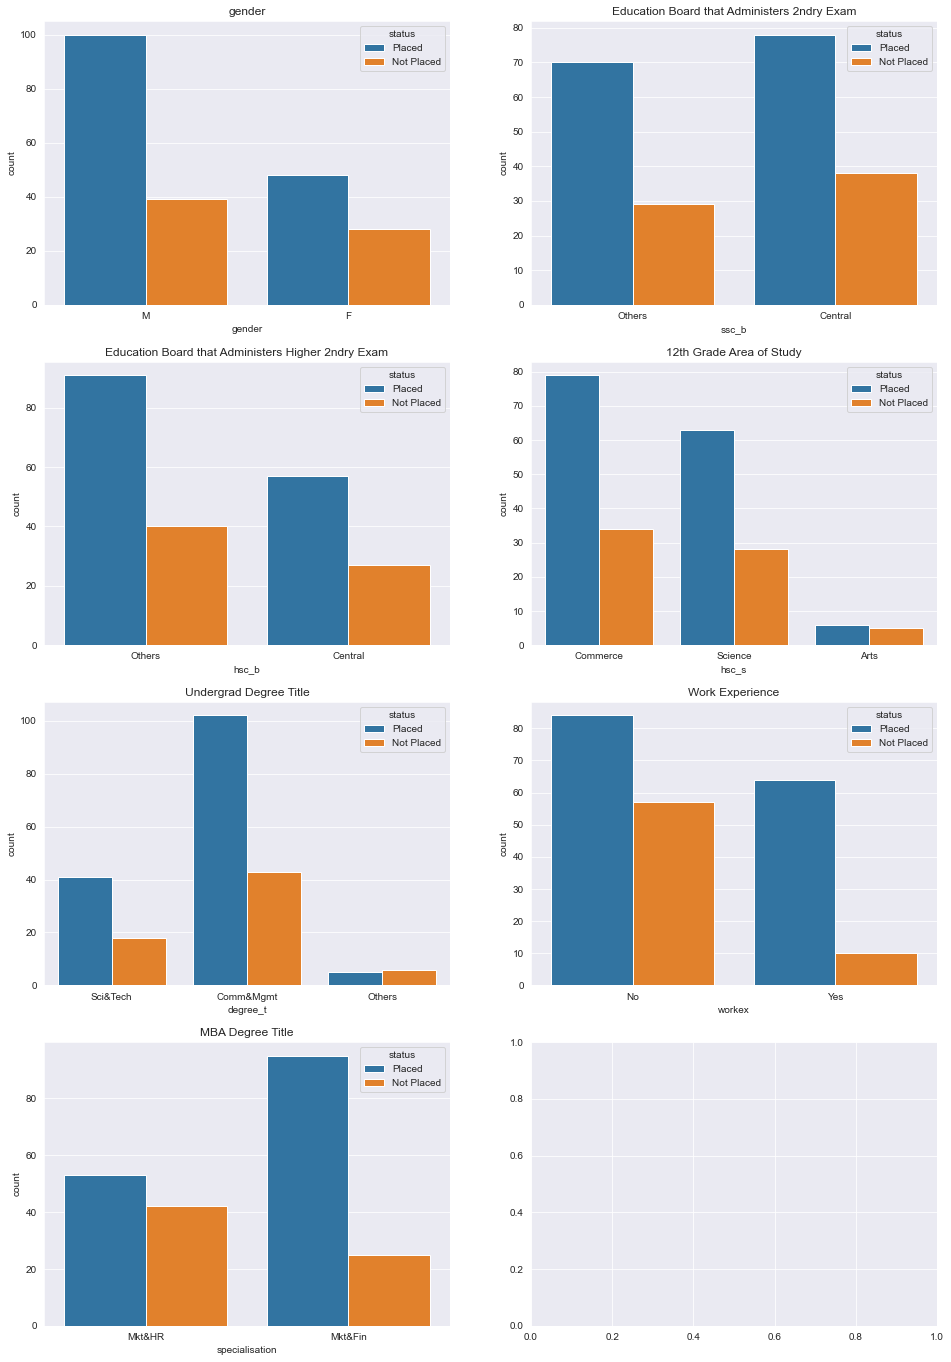

In [21]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(16,24))
sns.countplot(x = candidate_df['gender'], hue = candidate_df['status'], ax=axes[0,0])
axes[0,0].set(title = 'gender')
sns.countplot( x = candidate_df['ssc_b'], hue = candidate_df['status'], ax=axes[0,1])
axes[0,1].set(title = 'Education Board that Administers 2ndry Exam')
sns.countplot(x = candidate_df['hsc_b'], hue = candidate_df['status'], ax=axes[1,0])
axes[1,0].set(title = 'Education Board that Administers Higher 2ndry Exam')
sns.countplot( x = candidate_df['hsc_s'], hue = candidate_df['status'], ax=axes[1,1])
axes[1,1].set(title = '12th Grade Area of Study')
sns.countplot(x = candidate_df['degree_t'], hue = candidate_df['status'], ax=axes[2,0])
axes[2,0].set(title = 'Undergrad Degree Title')
sns.countplot( x = candidate_df['workex'], hue = candidate_df['status'], ax=axes[2,1])
axes[2,1].set(title = 'Work Experience')
sns.countplot(x = candidate_df['specialisation'], hue = candidate_df['status'], ax=axes[3,0])
axes[3,0].set(title = 'MBA Degree Title')

plt.show()

In [22]:
# More men get placed than women, which makes sense because there are more men in the dataset.

# The number of students who took secondary exam under the Central Education Board and got placed is almost the same number
# as those who took it under other education boards and also got placed. 

# More students who took the higher escondary exam under other education boards got placed, which makes sense because there
# are more students who took the higher secondary exam under other boards than the Central board.

# More students who centered their focus of 12th grade study on Commerce got placed, which makes sense since they dominate
# the dataset. Half of those who studied Arts did not get placed.

# More students who centered their focus of undergrad in Comm&Mgmt got placed, which makes sense since they dominate this
# dataset. More than half of those whose undergrad degree is other than Sci&Tech or Comm&Mgmt did not get placed.

# More students who did not have work experience got placed, which makes sense since they dominate this dataset. 
# Almost all students who did have prior experience got placed while a good amount of students who did not have experience
# did not get placed. Perhaps workex is a good indicator.

# More students whose MBA degree is Mkt&Fin got placed, which makes sense since there is more of them than those whose 
# MBA is Mkt&HR. Almost half of those whose MBA is Mkt&HR did not get placed.

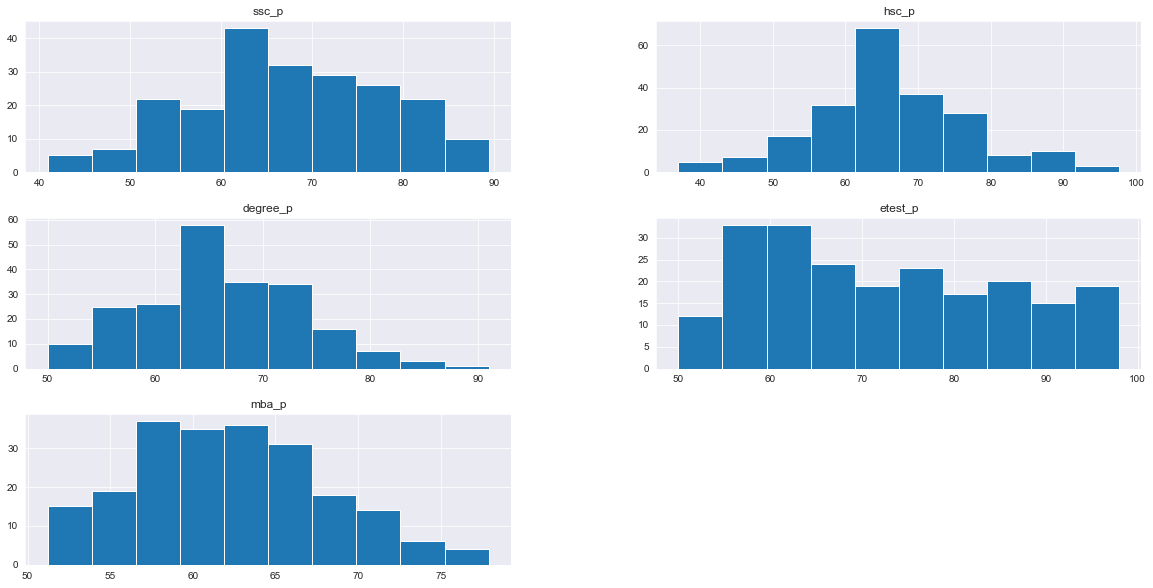

In [23]:
candidate_df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].hist(figsize = (20,10))
plt.show()

In [24]:
# Majority of ssc_p is between 60 and 80. It is left-skewed.

# hsc_p is a unimodal distribution, and majority is between 60 and 80.

# etest_p is almost uniform.

# mba_p is right-skewed, and majority is between 57 and 65.

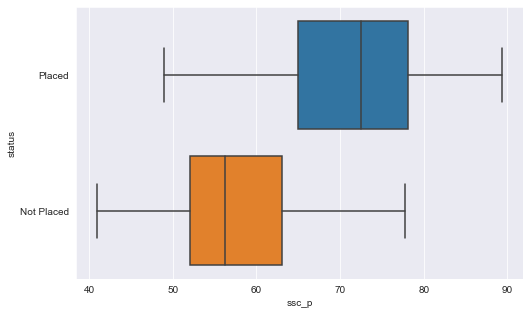

In [25]:
sns.boxplot(x=candidate_df['ssc_p'], y = candidate_df['status'])
plt.show()

In [26]:
# 50 % of placed students have a score higher than 72. The minimum score is 49 and max is 89. 
# 50 % of not placed students have a score lower than 57. The minimum is 41 and maximum is 78. 
# Those placed have higher Secondary scores. Perhaps ssc_p is a good indicator. 

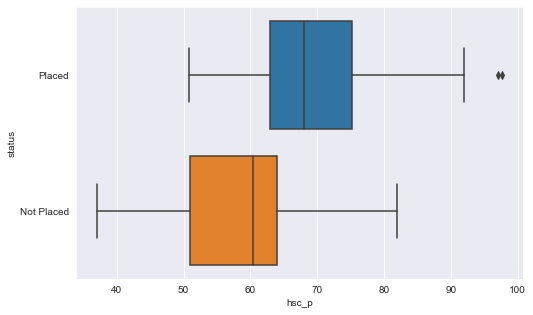

In [27]:
sns.boxplot(x=candidate_df['hsc_p'], y= candidate_df['status'])
plt.show()

In [28]:
# 50 % of placed students have a score higher than 67. The minimum score is 51 and max is 92. 
# 50 % of not placed students have a score lower than 60. The minimum is 37 and maximum is 82. 
# Those placed have higher Higher-Secondary scores. Perhaps hsc_p is a good indicator. 

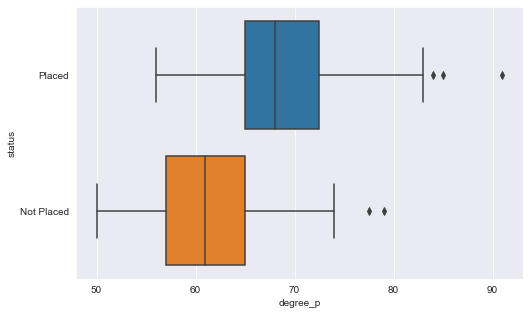

In [29]:
sns.boxplot(x = candidate_df['degree_p'], y = candidate_df['status'])
plt.show()

In [30]:
# 50 % of placed students have a degree score higher than 68. The minimum score is 55 and max is 82. 
# 50 % of not placed students have a score lower than 61. The minimum is 50 and maximum is 74. 
# Those placed have higher degree scores. Perhaps degree is a good indicator. 

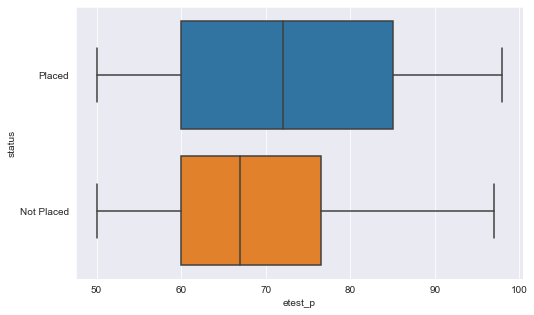

In [31]:
sns.boxplot(x = candidate_df['etest_p'], y = candidate_df['status'])
plt.show()

In [32]:
# 50 % of placed students have an employability test score higher than 72.
# 75 of not placed students have an etest_p less than 77.

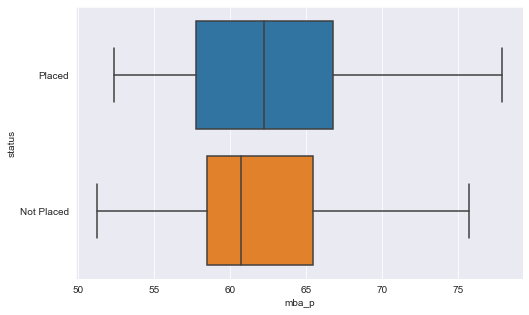

In [33]:
sns.boxplot(x=candidate_df['mba_p'], y= candidate_df['status'])
plt.show()

In [34]:
# 50 % of placed students have an employability test score higher than 62.
# 75 of not placed students have an etest_p less than 65.

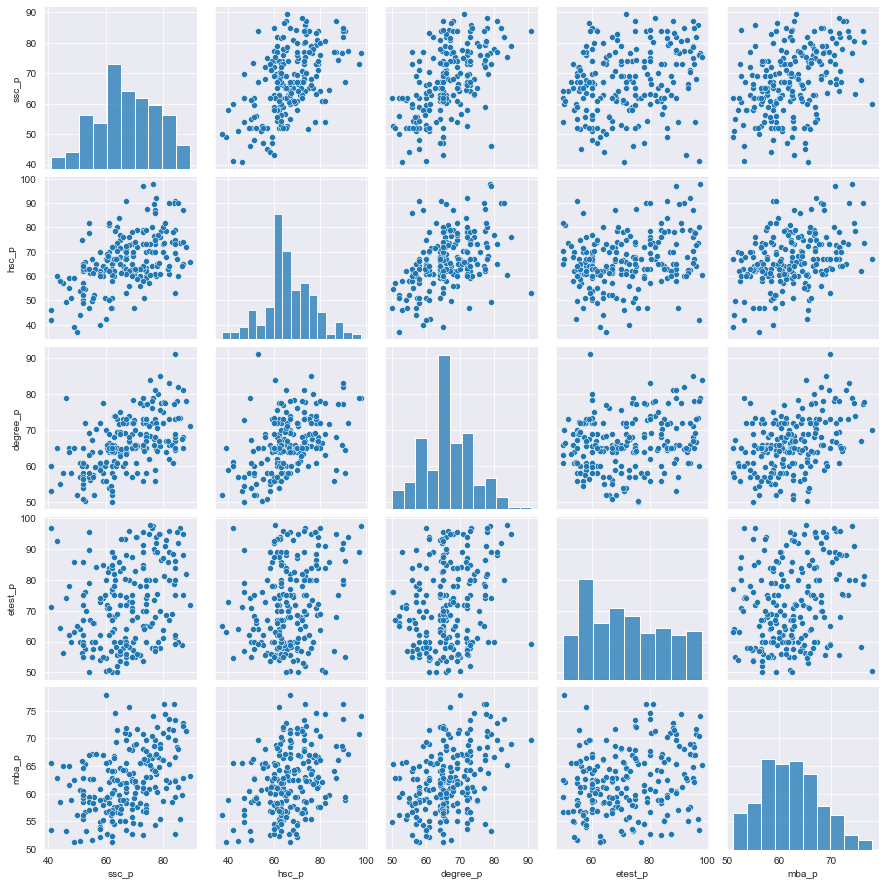

In [35]:
sns.pairplot(data = candidate_df)
plt.show()

In [36]:
# Perhaps there is a relationship between some variables. We will use the heatmap to double check.

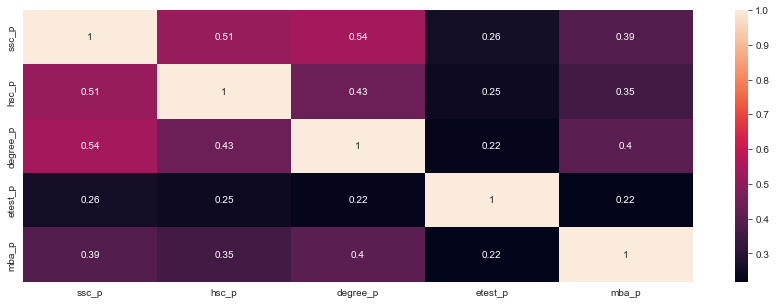

In [37]:
rcParams['figure.figsize'] = 15, 5

sns.heatmap(candidate_df.corr(), annot = True)
plt.show()

In [38]:
# There is no multicollinearity between the variables.

In [39]:
candidate_df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [40]:
# Cleaning - Encoding the discrete variables
candidate_df = pd.get_dummies(data = candidate_df, columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'], drop_first = True)
candidate_df.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0,1


In [41]:
# Standard scaling the variables
from sklearn.preprocessing import StandardScaler

X = candidate_df.drop('status_Placed', axis=1)
y = candidate_df['status_Placed']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [42]:
# splitting the variables
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)

In [43]:
# Creating Logistic Regression Model - inspired by Kaggle post

In [44]:
import statsmodels.api as sm

X_const = sm.add_constant(X_train)
reg_status = sm.Logit(y_train, X_const)
LogModel = reg_status.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


In [45]:
actual_predict_table = pd.DataFrame()
actual_predict_table['actual'] = y_test

X_test_const = sm.add_constant(X_test)
actual_predict_table['predict'] = np.round(LogModel.predict(X_test_const))
actual_predict_table

,actual,predict
0,1,1.0
153,1,0.0
188,0,0.0
37,1,1.0
207,1,1.0
...,...,...
113,1,1.0
67,1,1.0
105,0,0.0
101,1,1.0


In [46]:
LogModel.summary()

/Users/phunguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/phunguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          status_Placed   No. Observations:                  150
Model:                          Logit   Df Residuals:                      135
Method:                           MLE   Df Model:                           14
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                     inf
Time:                        11:45:33   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.0866      0.432      4.825      0.000       1.239       2.934
ssc_p                     2.7943      0.674      4.146      0.000       1.473       4.115
hsc_p                     1.0035      0.610      1.645      0.100      -0.192       2.199
degree_p                  1.4078      0.512      2.747      0.006       0.404       2.412
etest_p                  -0.5315      0.366     -1.452      0.147      -1.249       0.186
mba_p                    -1.0568      0.389     -2.716      0.007      -1.819      -0.294
gender_M                  0.7002      0.374      1.872      0.061      -0.033       1.433
ssc_b_Others             -0.4412      0.409     -1.078      0.281      -1.243       0.361
hsc_b_Others              0.6373      0.428      1.490      0.136      -0.201       1.476
hsc_s_Commerce           -0.9595      0.910     -1.054      0.292      -2.743       0.824
hsc_s_Science            -1.1211      0.958     -1.170      0.242      -2.999       0.757
degree_t_Others          -0.0630      0.390     -0.162      0.871      -0.827       0.701
degree_t_Sci&Tech        -0.4359      0.461     -0.945      0.345      -1.340       0.468
workex_Yes                0.6781      0.358      1.893      0.058      -0.024       1.380
specialisation_Mkt&HR    -0.1022      0.338     -0.302      0.763      -0.765       0.560
=========================================================================================
"""

In [47]:
# Factors like ssc_p, hsc_p,  mba_p, degree_p, and workex influence whether a student will get a job or not.

0.89


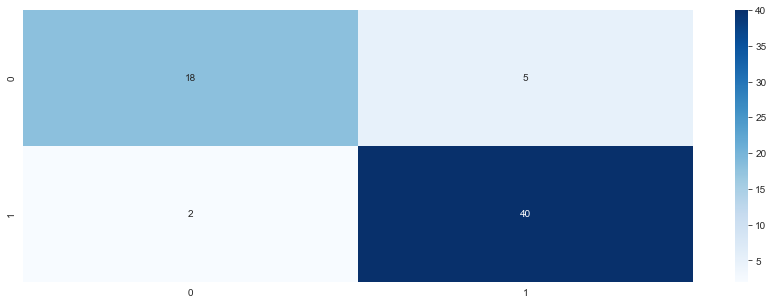

In [48]:
# Checking accuracy 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm_status = confusion_matrix(actual_predict_table['actual'], actual_predict_table['predict'])
acc_status = accuracy_score(actual_predict_table['actual'], actual_predict_table['predict'])

print(np.round(acc_status,2))
sns.heatmap(cm_status, cmap="Blues", annot=True)
plt.show()

In [49]:
# Getting F1 score, ROC AUC, Log Loss
from sklearn.metrics import f1_score, roc_auc_score, log_loss

f1 = f1_score(actual_predict_table['actual'], actual_predict_table['predict'])
roc = roc_auc_score(actual_predict_table['actual'], actual_predict_table['predict'])
log = log_loss(actual_predict_table['actual'], actual_predict_table['predict'])

print('f1 score: ', f1, '       ROC AUC score:', roc, '       Log Loss score: ', log)

f1 score:  0.9195402298850575        ROC AUC score: 0.8674948240165632        Log Loss score:  3.719622042331166


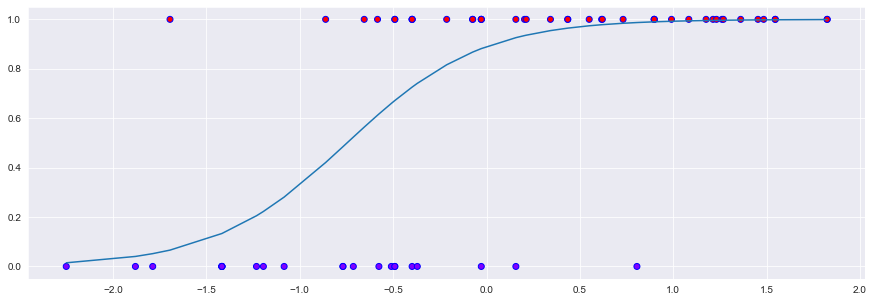

In [50]:
# Creating Sigmoid function (threshold) from Log model
from scipy.special import expit

df = pd.DataFrame({'x': X_test.iloc[:,0], 'y': y_test})
df = df.sort_values(by='x')

df2 = pd.read_html(LogModel.summary().tables[1].as_html(),  header=0, index_col=0)[0]
sigmoid_function = expit(df['x'] * df2['coef'].values[1] + df2['coef'].values[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

plt.show()

In [51]:
# Creating SVM model - inspired by Dr. Rizk SVM Slides

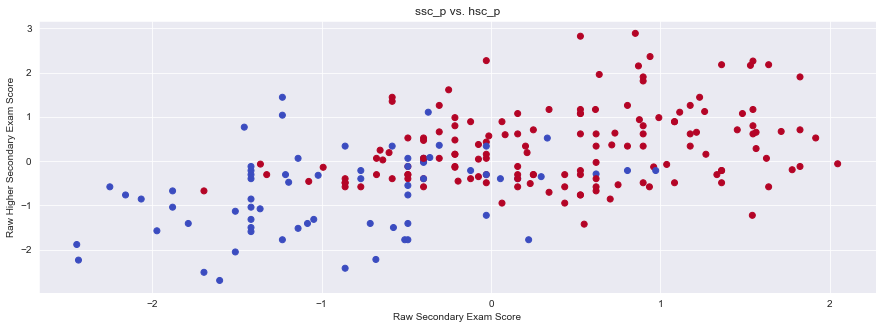

In [52]:
def visualize_data():
    y = candidate_df['status_Placed']
    plt.scatter(X_scaled['ssc_p'], X_scaled['hsc_p'], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Raw Secondary Exam Score')
    plt.ylabel('Raw Higher Secondary Exam Score')
    plt.title('ssc_p vs. hsc_p')
    plt.show()
visualize_data()

In [53]:
# The two exam scores are distinguishable.

In [54]:
from sklearn import svm

X = X_train[['ssc_p', 'hsc_p']]
y = y_train
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X,y)
lin_svc = svm.LinearSVC(C=C).fit(X,y)
rbf_svc=svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,y)
poly_svc=svm.SVC(kernel='poly', degree=3, C=C)
poly_svc.fit(X,y)

SVC(kernel='poly')

In [55]:
h=0.02 

# create a mesh to plot in
x_min, x_max=X_train['ssc_p'].min()-1,X_train['ssc_p'].max()+1
y_min, y_max=X_train['hsc_p'].min()-1,X_train['hsc_p'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# plot titles
titles = ['SVC with linear kernel',
         'LinearSVC(linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel']

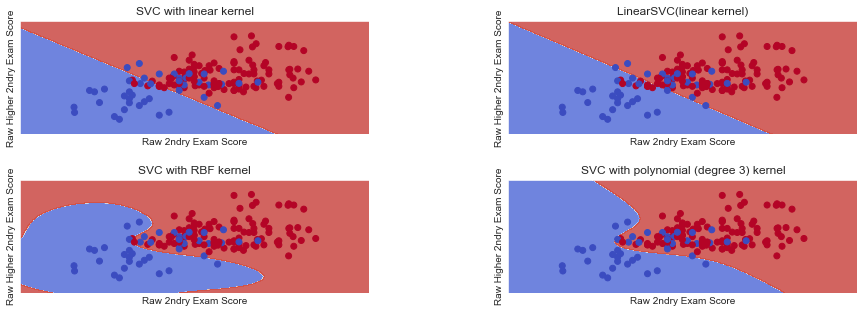

In [56]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. 
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_train['ssc_p'], X_train['hsc_p'], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Raw 2ndry Exam Score')
    plt.ylabel('Raw Higher 2ndry Exam Score')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

0.82


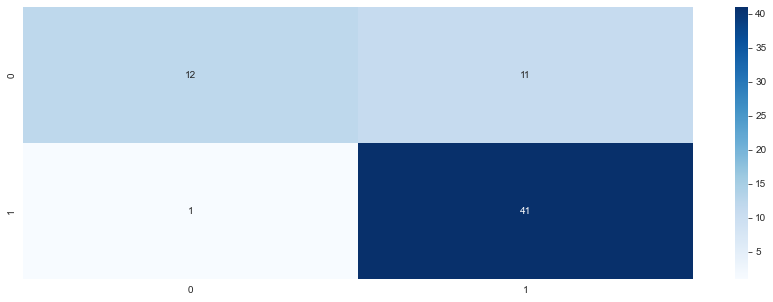

In [57]:
# Getting accuracy scores from SVC with Polynomial
predictions = poly_svc.predict(X_test[['ssc_p', 'hsc_p']])

cm_status = confusion_matrix(y_test, predictions)
acc_status = accuracy_score(y_test, predictions)

print(np.round(acc_status,2))
sns.heatmap(cm_status, cmap="Blues", annot=True)
plt.show()

In [58]:
f1_svm = f1_score(y_test, predictions)
roc_svm = roc_auc_score(y_test, predictions)
log_svm = log_loss(y_test, predictions)

print('f1 score: ', f1_svm, '       ROC AUC score:', roc_svm, '       Log Loss score: ', log_svm)

f1 score:  0.8723404255319148        ROC AUC score: 0.7489648033126294        Log Loss score:  6.376524804779391


In [59]:
# Comparing scores of the two models
print('Logistic - f1 score: ', f1, '       ROC AUC score:', roc, '       Log Loss score: ', log, '\n     SVM - f1 score: ', f1_svm, '       ROC AUC score:', roc_svm, '       Log Loss score: ', log_svm)

Logistic - f1 score:  0.9195402298850575        ROC AUC score: 0.8674948240165632        Log Loss score:  3.719622042331166 
     SVM - f1 score:  0.8723404255319148        ROC AUC score: 0.7489648033126294        Log Loss score:  6.376524804779391
